## Observations and Insights 

In [1]:
%matplotlib notebook

In [94]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single dataset
pharma_df = pd.merge(study_results,mouse_metadata ,on = "Mouse ID" , how = "left")
pharma_df.head()
# Display the data table for preview


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
len(pharma_df["Mouse ID"])
# 1893 are total mouse ID  including duplicates
uniquecnt = pharma_df["Mouse ID"].unique()
len(uniquecnt)

249

In [4]:
duplicatemiceId = pharma_df.loc[pharma_df.duplicated(subset = ["Mouse ID" ,"Timepoint"]),"Mouse ID" ].unique()
duplicatemiceId

array(['g989'], dtype=object)

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
pharma_df["Mouse ID"].value_counts()
timepointdf = pharma_df[["Mouse ID" ,"Timepoint"]]
timepointdf["Mouse ID"].value_counts()
timepointdf



,Mouse ID,Timepoint
0,b128,0
1,f932,0
2,g107,0
3,a457,0
4,c819,0
...,...,...
1888,r944,45
1889,u364,45
1890,p438,45
1891,x773,45


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
pharma_df.loc[pharma_df["Mouse ID"]== "g989"]
#dup_df = timepointdf[timepointdf.duplicated()]
#len(dup_df)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#unique_data = pharma_df.drop_duplicates()
#unique_data 
unique_data = pharma_df[pharma_df["Mouse ID"].isin(duplicatemiceId)==False]
unique_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [8]:
# Checking the number of mice in the clean DataFrame.
len(unique_data["Mouse ID"].unique())

248

## Summary Statistics

In [116]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

drugRegimendf = unique_data[["Drug Regimen","Tumor Volume (mm3)"]]
regimengroupby = drugRegimendf.groupby(["Drug Regimen"])
summarydf1 = pd.DataFrame(regimengroupby.mean())        
summarydf1 = summarydf1.rename(columns = {"Tumor Volume (mm3)": "Mean"})
summarydf1["median"] = drugRegimendf.groupby("Drug Regimen").median()
summarydf1["variance"] =drugRegimendf.groupby("Drug Regimen").var()
summarydf1["standard deviation"] =drugRegimendf.groupby("Drug Regimen").std()
summarydf1["sem"] = drugRegimendf.groupby("Drug Regimen").sem()
summarydf1

,Mean,median,variance,standard deviation,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


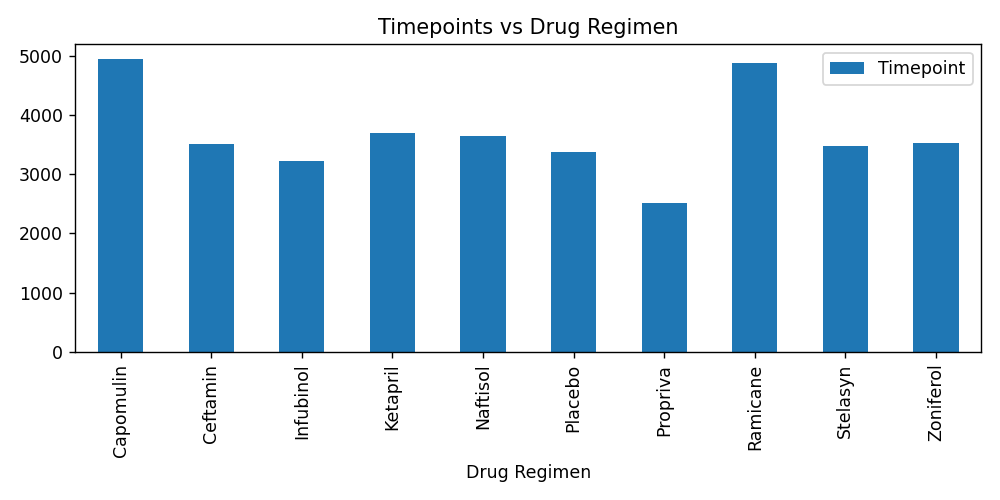

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepointsdf = pd.DataFrame(unique_data[["Drug Regimen","Timepoint"]])
timepointsdf = timepointsdf.groupby("Drug Regimen").sum()
timepointsdf
timepointsdf.plot(kind="bar", figsize=(8,4))
plt.title("Timepoints vs Drug Regimen")
plt.show()
plt.tight_layout()


<IPython.core.display.Javascript object>


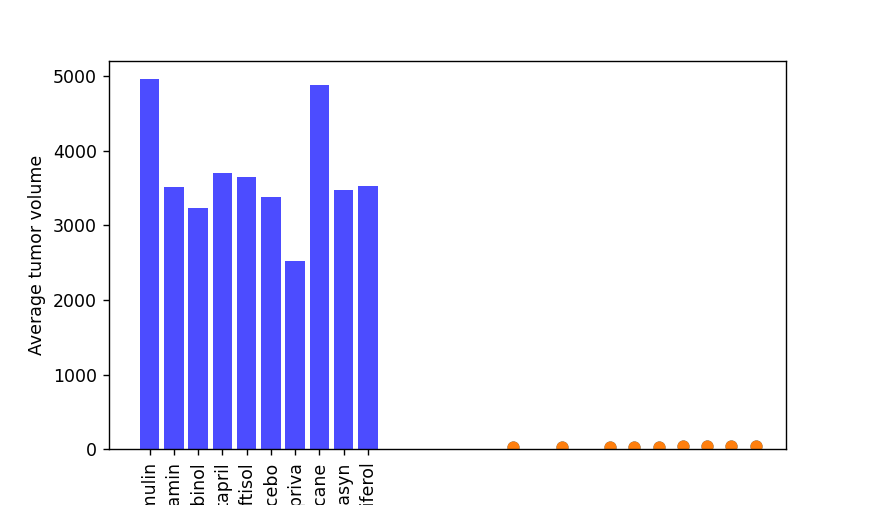

In [51]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.close()
timepointspyplotdf =timepointsdf
timepointspyplotdf = timepointspyplotdf.reset_index()
x_axis = np.arange(len(timepointspyplotdf))
x_axisticks =  timepointspyplotdf["Drug Regimen"].tolist()
plt.figure(figsize=(7,5))
plt.bar(x_axis, timepointspyplotdf["Timepoint"], color='b',alpha = 0.7, align="center")
plt.xticks(x_axis, x_axisticks, rotation="vertical")
plt.show()


<IPython.core.display.Javascript object>


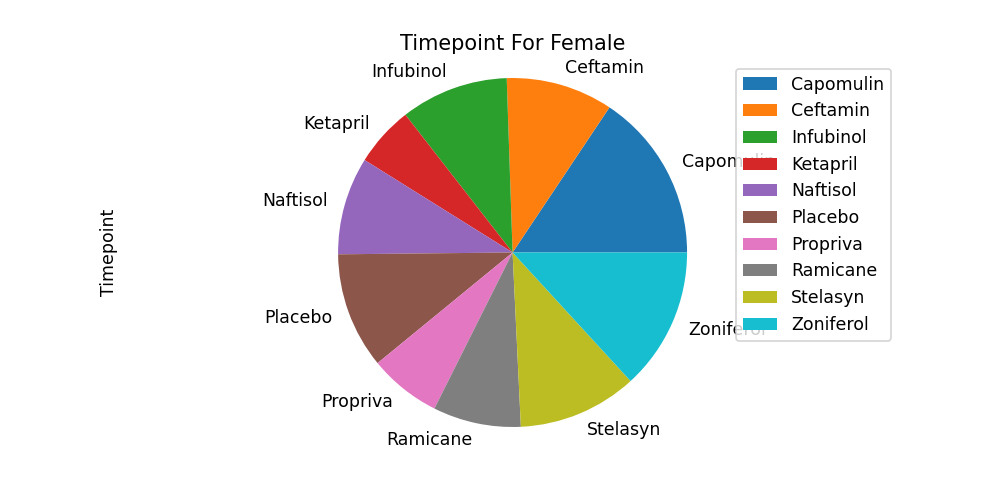

(-1.1009779242509492,
 1.1000465746150008,
 -1.1032227606022826,
 1.1032289755068312)

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plt.close()
genderdf = pharma_df[["Drug Regimen","Timepoint","Sex"]]
genderdfgroupby = genderdf.groupby(["Sex","Drug Regimen"])
sumgenderdf = genderdfgroupby.sum()
gender_id = "Female"
gendf = sumgenderdf.loc[gender_id]
# Create a pie chart based upon the timepoint of that single bike
gaxes = gendf.plot(kind="pie",figsize=(8,4), y='Timepoint', title=("Timepoint For " + gender_id),legend = bool  )
gaxes.set_ylabel("Timepoint")
plt.show()
plt.axis("equal")

<IPython.core.display.Javascript object>


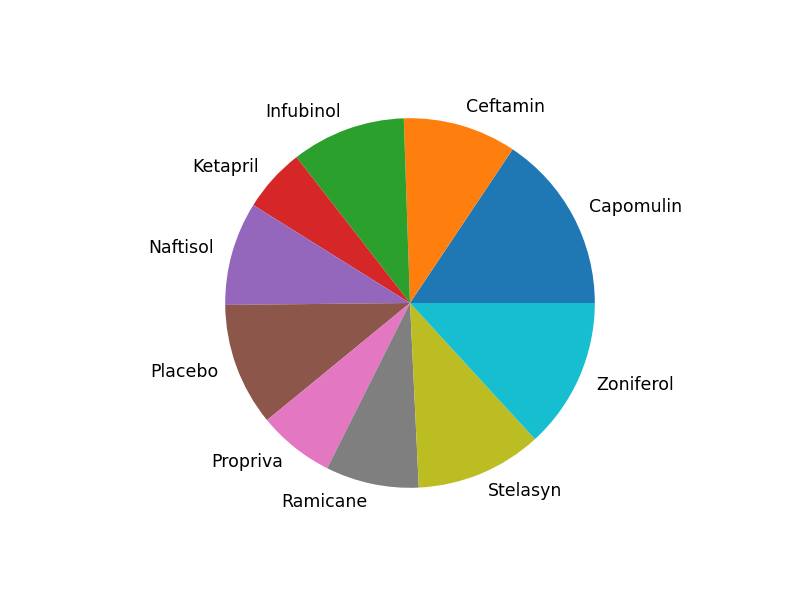

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.close()
piedf = gendf.reset_index()
labels = piedf["Drug Regimen"].tolist()
data = piedf["Timepoint"].tolist()
plt.pie(data,  labels=labels)
plt.show()

In [17]:
plt.close()

## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatestTimepointdf = unique_data[["Mouse ID","Timepoint"]]
maxdf = greatestTimepointdf.groupby("Mouse ID").max()
maxdf = maxdf.reset_index()
maxdf
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxdf = maxdf.merge(unique_data, on = ["Mouse ID", "Timepoint"] , how = "left")
maxdf

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
treatmentreg = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumorvol= []
micedf = pd.DataFrame()
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes
for i in treatmentreg:
    micedf = micedf.append(maxdf.loc[maxdf["Drug Regimen"] == i])   
#micedf                   
    # add subset 
    
    # Determine outliers using upper and lower bounds
quartiles = micedf['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile is: {lowerq}")
print(f"The upper quartile is: {upperq}")
print(f"The interquartile range is: {iqr}")
print(f"The the median is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")                    

The lower quartile is: 37.187743802499995
The upper quartile is: 59.930261755000004
The interquartile range is: 22.74251795250001
The the median is: 45.0 
Values below 3.0739668737499812 could be outliers.
Values above 94.04403868375002 could be outliers.


<IPython.core.display.Javascript object>


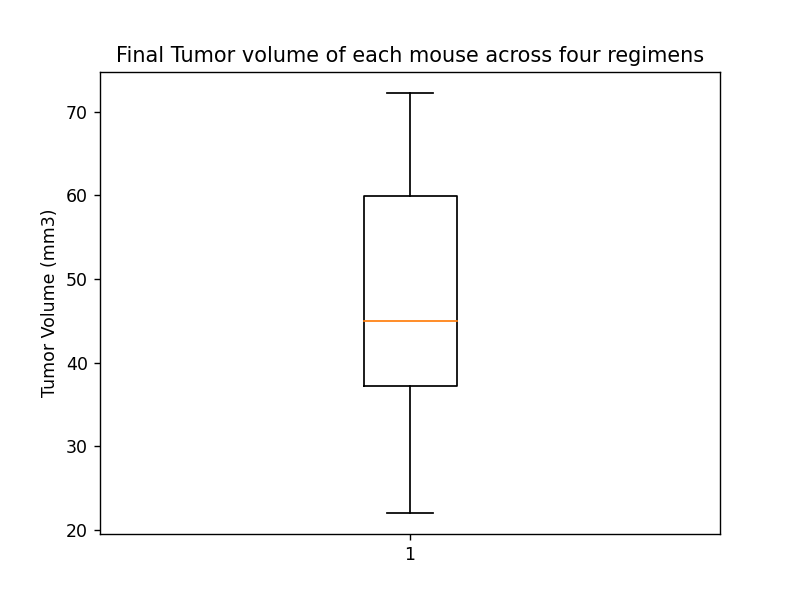

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
tumorvol = micedf["Tumor Volume (mm3)"]
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor volume of each mouse across four regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumorvol)
plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


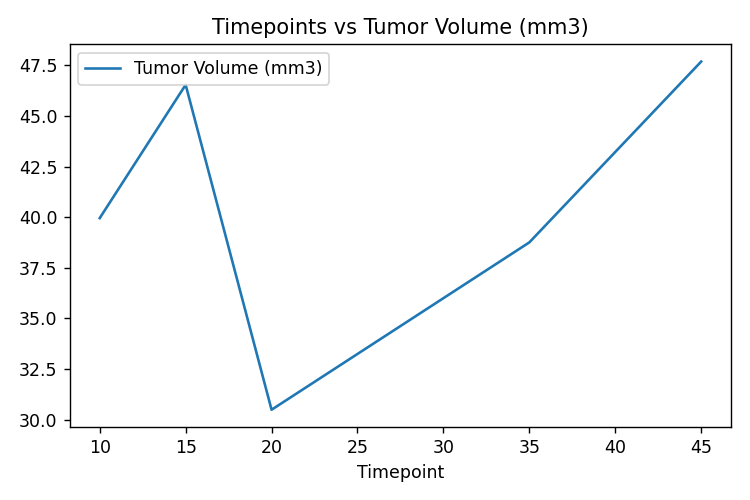

In [73]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#get the mouse traeted by Capomulin
Capomulindf = micedf.loc[micedf["Drug Regimen"]== "Capomulin"]
#get Timpoint and tumor volume
lineplotdf = Capomulindf[["Timepoint", "Tumor Volume (mm3)","Mouse ID"]]
lineplotmaxdf = lineplotdf.groupby("Timepoint").max()
lineplotmaxdf.plot(kind="line" ,figsize=(6,4))
plt.title("Timepoints vs Tumor Volume (mm3)")
plt.show()
plt.tight_layout()

In [58]:
#lineplotdf
linedf
lineplotmaxdf

,Tumor Volume (mm3),Mouse ID
Timepoint,,
10,39.952347,w150
15,46.539206,r157
20,30.485985,f966
35,38.753265,j246
45,47.685963,y793


<IPython.core.display.Javascript object>


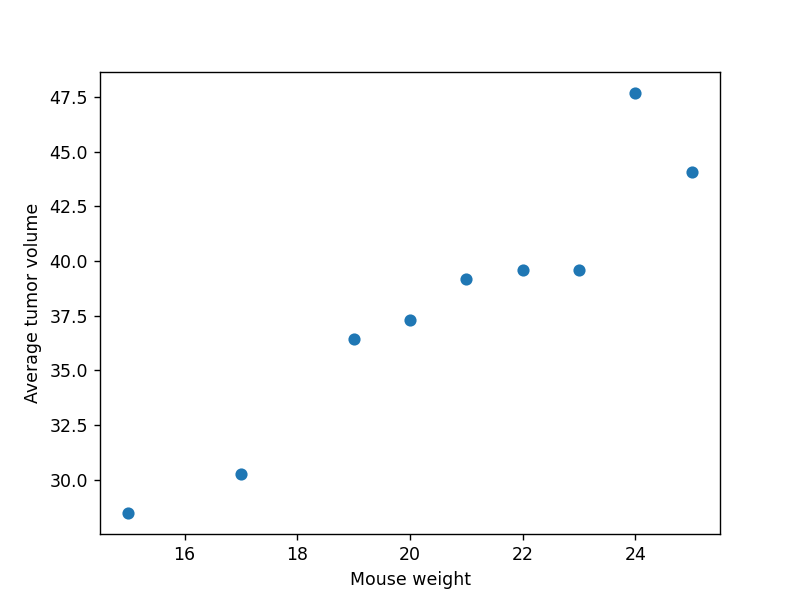

In [96]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.close()
scatterplot = Capomulindf[["Weight (g)", "Tumor Volume (mm3)"]]
scatterplotdf = scatterplot.groupby("Weight (g)").mean()
scatterplotdf = scatterplotdf.reset_index()
avgtvol = scatterplotdf['Tumor Volume (mm3)']
weight = scatterplotdf['Weight (g)']
#get linear regression for x and y values 
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight,avgtvol)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weight,avgtvol)
plt.annotate(line_eq,(3,2),fontsize=15,color="red")
plt.xlabel("Mouse weight")
plt.ylabel("Average tumor volume")
plt.show()


## Correlation and Regression

In [89]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
corrcoeff = round(st.pearsonr(avgtvol,weight)[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimenis {corrcoeff}")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimenis 0.95
